# Exploratory Data Analysis and Visualizations

## Introduction

For this section, we'll be conducting a basic exploratory data analysis on the **cleaned excel file** of household incomes by race. Both excel files can be found in the repository. The original dataset is provided by the U.S. Census Bureau and can be found [here](https://www.census.gov/data/tables/2020/demo/income-poverty/p60-270.html).

The goal of this EDA are as follows:
- What percentage of each race is in each social class (high income and low income)?
- Find out the average salary of blacks
- How does the income of a black person compare to everyone else?

In [1]:
# Import the libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File is a dict with all the dataframes as keys
file = pd.read_excel("cleaned_data.xlsx",
                     index_col=0,
                     sheet_name=["all_races",
                                 "white",
                                 "black",
                                 "asian",
                                 "hispanic"]) 

# Exploring `all_races`

## What percentage of the population are classified as high income?

Let's first look at the trend of high income households from 1967 to 2019. For this analysis, we'll define "high income" as $150,000 and above. The values in the income range columns represent the **percentage** of the total respondents. 

##Definition reference here, by investopedia.com##

In [3]:
file["all_races"] #[['$50,000 - 74,999','$75,000 - 99,999']]

,year,num (thousands),"< $15,000","$15,000 - 24,999","$25,000 - 34,999","$35,000 - 49,999","$50,000 - 74,999","$75,000 - 99,999","$100,000 - 149,999","$150,000 - 199,999","> $200,000",median_estimate,median_error,mean_estimate,mean_error
0,2019,128451,9.1,8.0,8.3,11.7,16.5,12.3,15.5,8.3,10.3,68703,904,98088,1042
1,2018,128579,10.1,8.8,8.7,12.0,17.0,12.5,15.0,7.2,8.8,64324,704,91652,914
3,2017,127586,10.1,9.1,9.2,11.9,16.3,12.6,14.8,7.5,8.5,64007,575,89922,892
4,2016,126224,10.4,9.0,9.2,12.3,16.7,12.2,15.0,7.2,8.0,62898,764,88578,822
5,2015,125819,10.6,10.0,9.6,12.1,16.1,12.4,14.9,7.1,7.2,60987,570,85533,715
6,2014,124587,11.4,10.5,9.6,12.6,16.4,12.1,14.0,6.6,6.8,58001,697,81870,793
7,2013,123931,11.4,10.3,9.5,12.5,16.8,12.0,13.9,6.7,6.9,58904,1183,82660,1201
9,2012,122459,11.4,10.6,10.1,12.5,17.4,12.0,13.9,6.3,5.9,56912,384,79510,773
10,2011,121084,11.6,10.2,10.2,13.1,17.2,11.9,13.8,6.2,5.8,57021,470,79375,690
11,2010,119927,11.2,10.7,9.4,13.3,16.8,12.4,14.1,6.3,5.9,57904,628,79192,696


In [4]:
file["all_races"].columns

Index(['year', 'num (thousands)', '< $15,000', '$15,000 - 24,999',
       '$25,000 - 34,999', '$35,000 - 49,999', '$50,000 - 74,999',
       '$75,000 - 99,999', '$100,000 - 149,999', '$150,000 - 199,999',
       '> $200,000', 'median_estimate', 'median_error', 'mean_estimate',
       'mean_error'],
      dtype='object')

In [5]:
# Brief overview of data
file["all_races"].head(15)

,year,num (thousands),"< $15,000","$15,000 - 24,999","$25,000 - 34,999","$35,000 - 49,999","$50,000 - 74,999","$75,000 - 99,999","$100,000 - 149,999","$150,000 - 199,999","> $200,000",median_estimate,median_error,mean_estimate,mean_error
0,2019,128451,9.1,8.0,8.3,11.7,16.5,12.3,15.5,8.3,10.3,68703,904,98088,1042
1,2018,128579,10.1,8.8,8.7,12.0,17.0,12.5,15.0,7.2,8.8,64324,704,91652,914
3,2017,127586,10.1,9.1,9.2,11.9,16.3,12.6,14.8,7.5,8.5,64007,575,89922,892
4,2016,126224,10.4,9.0,9.2,12.3,16.7,12.2,15.0,7.2,8.0,62898,764,88578,822
5,2015,125819,10.6,10.0,9.6,12.1,16.1,12.4,14.9,7.1,7.2,60987,570,85533,715
6,2014,124587,11.4,10.5,9.6,12.6,16.4,12.1,14.0,6.6,6.8,58001,697,81870,793
7,2013,123931,11.4,10.3,9.5,12.5,16.8,12.0,13.9,6.7,6.9,58904,1183,82660,1201
9,2012,122459,11.4,10.6,10.1,12.5,17.4,12.0,13.9,6.3,5.9,56912,384,79510,773
10,2011,121084,11.6,10.2,10.2,13.1,17.2,11.9,13.8,6.2,5.8,57021,470,79375,690
11,2010,119927,11.2,10.7,9.4,13.3,16.8,12.4,14.1,6.3,5.9,57904,628,79192,696


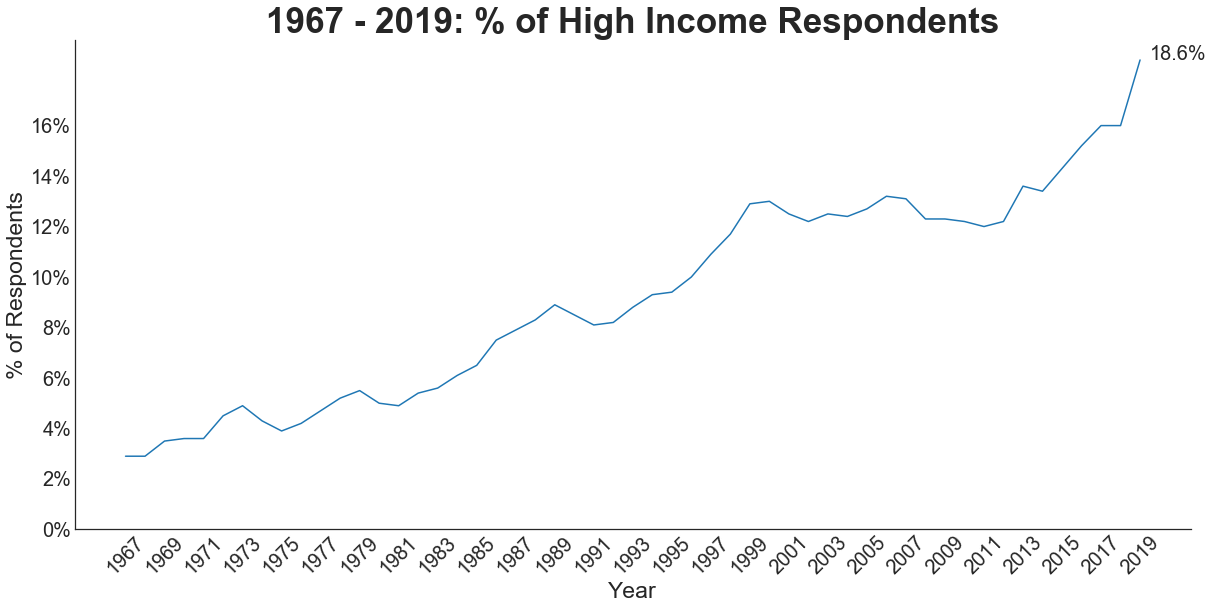

In [6]:
#################################################
## Let's plot people classified as high income ##
#################################################

plt.style.use("seaborn-white")

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot()

# Get each column we want to plot
y = [file["all_races"]['$150,000 - 199,999'], 
     file["all_races"]['> $200,000']]

# Graphing each line based on the column
plt.plot(file["all_races"]["year"], 
         y[0]+y[1], # Adding the 2 column values together
         label="High Income") 


# Addying y-label, x-label, title, and legend
plt.ylabel("% of Respondents", fontdict={"fontsize":23})
plt.xlabel("Year", fontdict={"fontsize":23})
plt.title("1967 - 2019: % of High Income Respondents", 
          fontdict={
                    "fontsize":35, 
                    "fontweight":"bold"}
         )

# Setting the range for the x ticks to 1967 - 2019
plt.xticks(np.arange(min(file["all_races"]["year"]), 
                     max(file["all_races"]["year"])+1,2), 
           rotation=45) 
plt.yticks(np.arange(0, 18, 2), ["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%", "16%"])

# Changing the label size
ax.tick_params(labelsize=20)

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# Adding the percentage text for each line
plt.text(2019.5, y[0][0]+y[1][0], "{}%".format(y[0][0]+y[1][0]), fontdict={"fontsize":20})


plt.show()

## Findings

Based on the line chart above, there is a general increase in high income. As of 2019, **18.6% of all races** are classified as high income.

## What percentage of the population are classified as low income?

Next, we'll plot the percentage of households who make less than \\$50,000 from 1967 to 2019.  I chose $50,000 as the threshold to be classified as low income based on this [article](https://www.nccp.org/demographic/) by the National Center for Children in Poverty (NCCP).

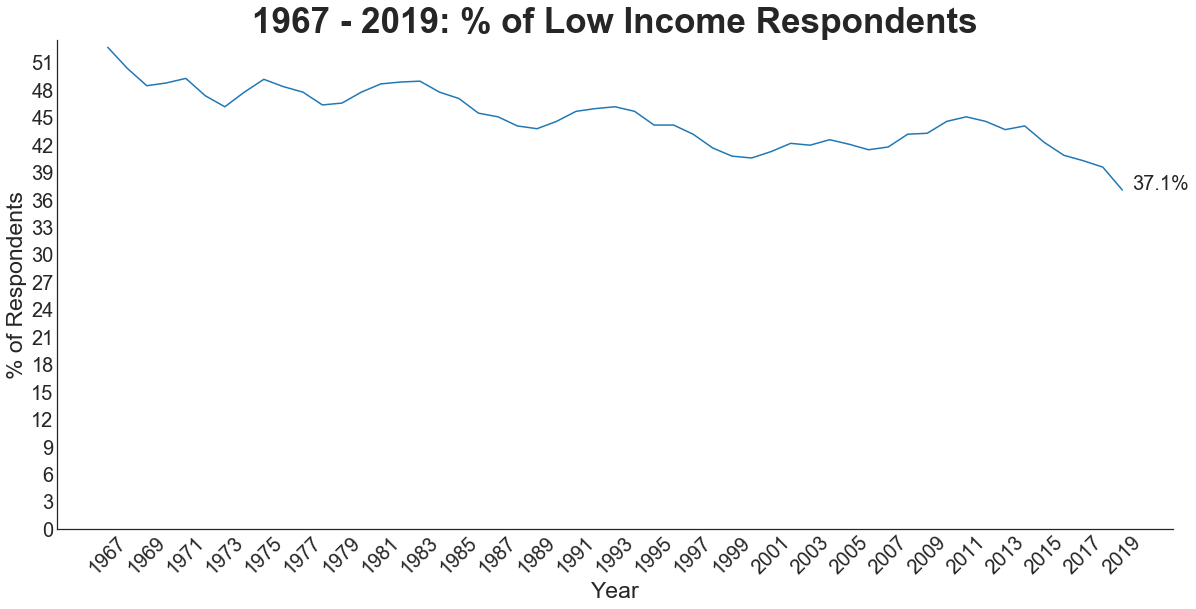

In [7]:
###########################
## Let's plot low income ##
###########################

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot()

# Get each column we want to plot
y = [file["all_races"]['< $15,000'], 
     file["all_races"]['$15,000 - 24,999'], 
     file["all_races"]['$25,000 - 34,999'],
     file["all_races"]['$35,000 - 49,999']]


# Graphing each line based on the column
plt.plot(file["all_races"]["year"], 
         sum(y))


# Addying y-label, x-label, title, and legend
plt.ylabel("% of Respondents", fontdict={"fontsize":23})
plt.xlabel("Year", fontdict={"fontsize":23})
plt.title("1967 - 2019: % of Low Income Respondents", 
          fontdict={
                    "fontsize":35, 
                    "fontweight":"bold"}
         )


# Setting the range for the x ticks to 1967 - 2019
plt.xticks(np.arange(min(file["all_races"]["year"]), 
                     max(file["all_races"]["year"])+1,2), 
           rotation=45) 
plt.yticks(np.arange(0, 54, 3))


# Changing the label size
ax.tick_params(labelsize=20)


# Removing the graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adding the percentage text for each line
plt.text(2019.5, sum(y)[0], "{}%".format(sum(y)[0]), fontdict={"fontsize":20})
# plt.text(2019.5, y[1][0]-.7, "{}%".format(y[1][0]), fontdict={"fontsize":20})
# plt.text(2019.5, y[2][0]-.3, "{}%".format(y[2][0]), fontdict={"fontsize":20})
# plt.text(2019.5, y[3][0]+.3, "{}%".format(y[3][0]), fontdict={"fontsize":20})



plt.show()


## Findings

Based on the line graph above, we can see that there is a general decrease of low income. However, as of 2019, **37.1% of all races** are being classified as low income.

## Percent distribution for 2019?

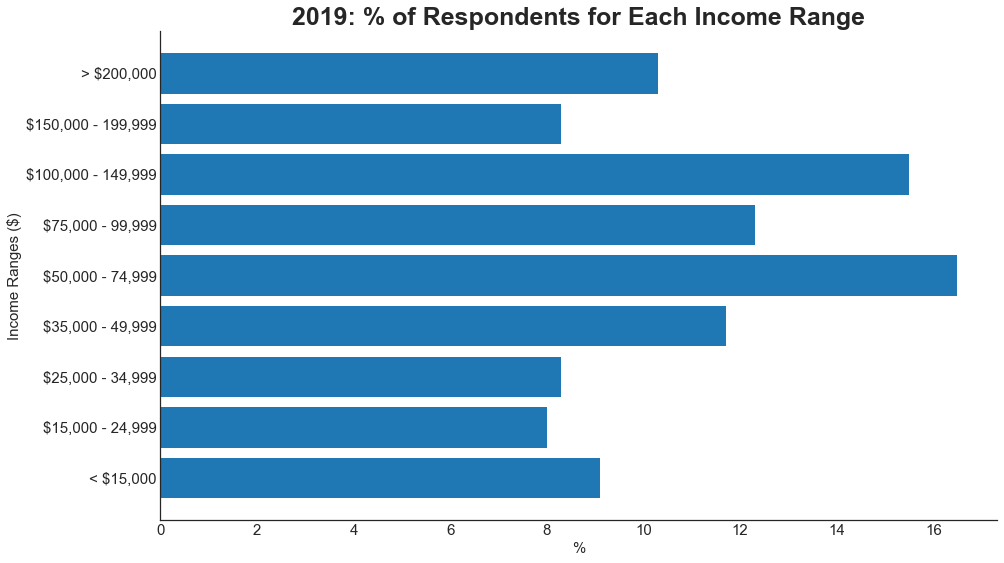

In [8]:
#######################################
## Let's plot both on the same graph ##
#######################################

plt.style.use("seaborn-white")

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot()

# Get each 2019 value we want to plot
y = [file["all_races"]['< $15,000'][0], 
     file["all_races"]['$15,000 - 24,999'][0], 
     file["all_races"]['$25,000 - 34,999'][0],
     file["all_races"]['$35,000 - 49,999'][0],
     file["all_races"]['$50,000 - 74,999'][0],
     file["all_races"]['$75,000 - 99,999'][0],
     file["all_races"]["$100,000 - 149,999"][0], 
     file["all_races"]['$150,000 - 199,999'][0], 
     file["all_races"]['> $200,000'][0]]

ax.barh(y=file["all_races"].columns[2:11],
       width=y)

plt.tick_params(labelsize=15)

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.ylabel("Income Ranges ($)", fontdict={"fontsize":15})
plt.xlabel("%", fontdict={"fontsize":15})
plt.title("2019: % of Respondents for Each Income Range",
          fontdict={
                    "fontsize":25, 
                    "fontweight":"bold"}
         )

plt.show()

From the bar graph above, as of 2019, we can see that more households have an income ranging from \\$50,000 to \\$74,999. Not surprisingly, with the median income of 2019 and some research, the median income is about \\$68,000

## How do the median incomes compare?

Next, we'll explore the median incomes for **each race**. The median is a more accurate measure of the U.S. compared to the mean because the median won't weigh outliers as heavily. There might be a possibility that someone makes over $1,000,000 and that would heavily skew the mean income. 

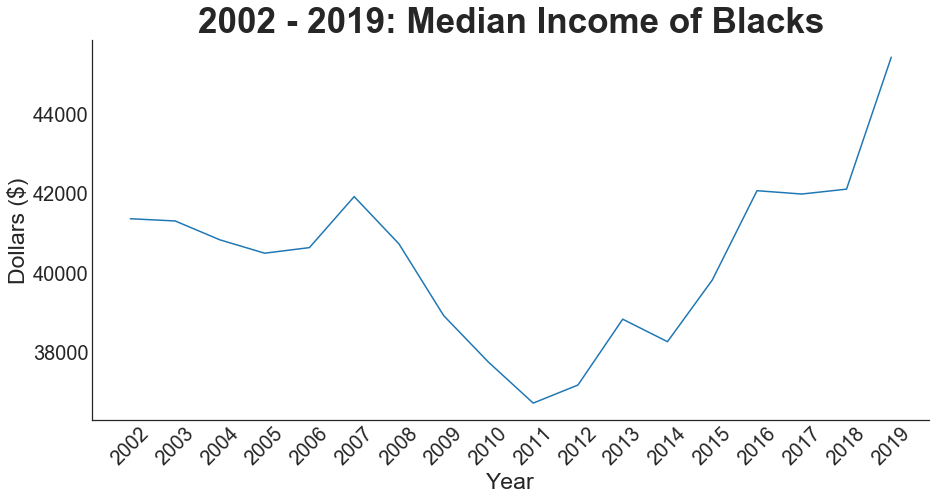

In [9]:
#########################################
## Let's plot median income for blacks ##
#########################################


plt.style.use("seaborn-white")

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

y = file["black"]['median_estimate']

plt.plot(file["black"]["year"], y, label="Black")

plt.ylabel("Dollars ($)", fontdict={"fontsize":23})
plt.xlabel("Year", fontdict={"fontsize":23})
plt.title("2002 - 2019: Median Income of Blacks", 
          fontdict={
                    "fontsize":35, 
                    "fontweight":"bold"}
         )


# Setting the range for the x ticks to 2002 - 2019
plt.xticks(np.arange(min(file["black"]["year"]), 
                     max(file["black"]["year"])+1,1), 
           rotation=45) 

# Changing the label size
ax.tick_params(labelsize=20)

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()




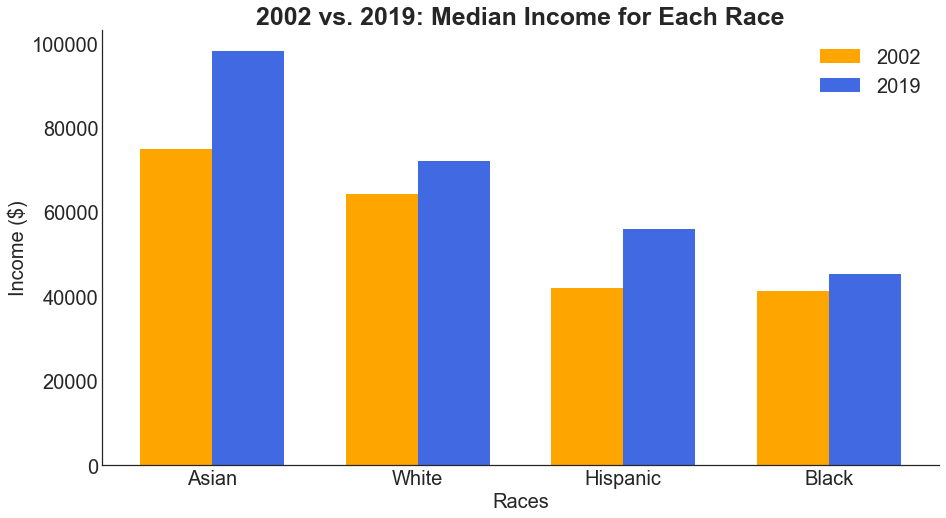

In [10]:
#############################################################
## Let's see how the median incomes compare with each race ##
#############################################################

from matplotlib.patches import Patch

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

races = ["asian", "white", "hispanic", "black"]
width = .35

# Getting the race name and plotting the respective key in the file dictionary
for r in races:
    ax.bar(x=r, 
           height=file[r]["median_estimate"][0], 
           color="royalblue",
           width=width,
           align="edge",
           label="2019") # 2019 bar
    ax.bar(x=r, 
           height=file[r]["median_estimate"].iloc[-1], 
           color="orange",
           width=-width,
           align="edge",
           label="2002") # 2002 bar

# Capitalizing the x ticks and changing size
plt.xticks(ticks=races, labels=["Asian", "White", "Hispanic", "Black"])
plt.tick_params(labelsize=20)

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Labeling x-axis, y-axis, and title
plt.xlabel("Races", fontdict={"fontsize":20})
plt.ylabel("Income ($)", fontdict={"fontsize":20})
plt.title("2002 vs. 2019: Median Income for Each Race",
          fontdict={
                    "fontsize":25, 
                    "fontweight":"bold"}
         )

# Creating our own legend
legend_elements = [Patch(facecolor="orange", label="2002"),
                   Patch(facecolor="royalblue", label="2019")]
ax.legend(handles=legend_elements, loc=0, fontsize=20)


plt.show()





From the bar graph above, from the highest to lowest median income, asians, whites, hispanics, and blacks are ordered respectively. Interesting to note that in 2002, hispanics made about the same as blacks, but in 2019, there is a slight difference between the two races.

Moving on with the analysis, let's compare the median income for whites and blacks in 2019. 

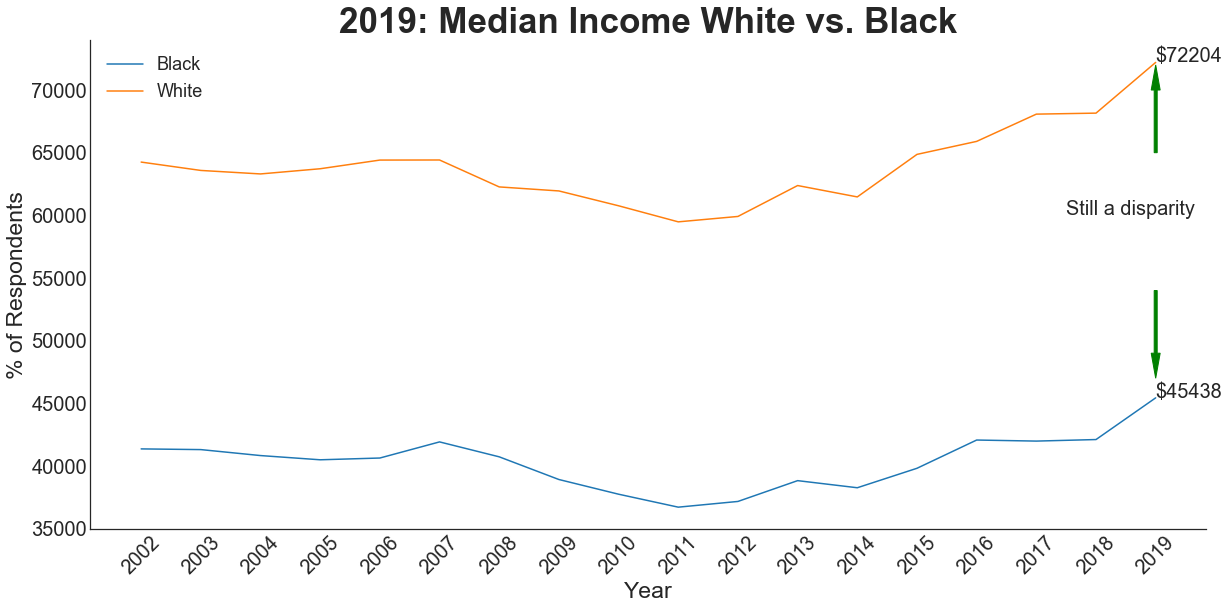

In [11]:
##########################################################################
## Lets plot the median income for every year (American) white vs black ##
##########################################################################

plt.style.use("seaborn-white")

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot()

# Get each column we want to plot
y = file["black"]['median_estimate']
z = file["white"]['median_estimate']

# Graphing each line based on the column
plt.plot(file["black"]["year"], y, label="Black")
plt.plot(file["white"]["year"], z, label="White")

# Addying y-label, x-label, title, and legend
plt.ylabel("% of Respondents", fontdict={"fontsize":23})
plt.xlabel("Year", fontdict={"fontsize":23})
plt.title("2019: Median Income White vs. Black", 
          fontdict={
                    "fontsize":35, 
                    "fontweight":"bold"}
         )
plt.legend(loc=0, fontsize=18)


# Setting the range for the x ticks to 2002 - 2019
plt.xticks(np.arange(min(file["black"]["year"]), 
                     max(file["black"]["year"])+1,1), 
           rotation=45) 

# Changing the label size
ax.tick_params(labelsize=20)

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Annotating the graph
plt.text(x=2019, 
         y=y[0]+.08, 
         s="${}".format(y[0]), 
         fontdict={"fontsize":20}) # Annotating $6653 on graph
plt.text(x=2019, 
         y=z[0]-.1, s=
         "${}".format(z[0]), 
         fontdict={"fontsize":20}) # Annotating $101732 on graph
plt.text(x=2017.5, 
         y=60000, 
         s="Still a disparity", 
         fontdict={"fontsize":20})

# Arrow pointing up
plt.arrow(2019, 65000, 0, 5000, 
          width=.05, 
          head_length=2000,
          color='g')
# Arrow pointing down
plt.arrow(2019, 54000, 0, -5000, 
          width=.05, 
          head_length=2000,
          color='g')

plt.show()




From the graph above, we can see that the income disparity generally hasn't improved since 2002. This is an issue that has many causes, such as discrimination in the workplace, access to education, and so on. 

## Proportionally comparing how much a race makes relative to another race

Given the median incomes, we know that blacks make the least, but let's look at it in a different perspective. Let's calculate how much a black person (and the other races) makes for every $1 a white person makes. This way we can see proportionally, how much of a disparity there is. 

In [12]:
#############################################
## Getting the median income for each race ##
#############################################

for race in races:
    print("{}: {}".format(race, file[race]["median_estimate"][0]))

asian: 98174
white: 72204
hispanic: 56113
black: 45438


In [13]:
########################################################################
## Calculating for every $1 a black person makes, race makes how much ##
########################################################################

change = []

races = ["asian","white","hispanic"]

for race in races:
    diff = file[race]["median_estimate"][0] - file["black"]["median_estimate"][0]
    perc_change = (diff / file["black"]["median_estimate"][0])
    change.append(perc_change)

print("On average, blacks make {:.2f} less than their counterparts. Based on this dataset.".format(np.mean(change)))

# pay_diff = []
# for x in change:
#     pay = 1 + x*1
#     pay_diff.append(pay)
    
# for i, r in enumerate(races):
#     print("For every $1 a black person makes, a(n) {} person makes ${:.2f}.".format(r, pay_diff[i]))


On average, blacks make 0.66 less than their counterparts. Based on this dataset.


In [14]:
##################################################################
## Calculating for every $1 a white person, race makes how much ##
##################################################################

races_w = ["asian","hispanic","black"]

# Store the percent changes
change_w = []

# Calculating the percent change relative to the white median income in 2019
for race in races_w:
    diff = file[race]["median_estimate"][0] - file["white"]["median_estimate"][0]
    perc_change = (diff / file["white"]["median_estimate"][0])
    change_w.append(perc_change)

# Store the pay differences 
pay_diff_w = []

# Calculating the amount each race makes relative to $1 (a white person)
for x in change_w:
    pay = 1 + x*1
    pay_diff_w.append(pay)

for i, r in enumerate(races_w):
    print("For every $1 a white person makes, a(n) {} person makes ${:.2f}.".format(r, pay_diff_w[i]))

For every $1 a white person makes, a(n) asian person makes $1.36.
For every $1 a white person makes, a(n) hispanic person makes $0.78.
For every $1 a white person makes, a(n) black person makes $0.63.


From our calculations above, for every $1 a white person makes:
- An asian person makes \\$1.36
- A hispanic person makes \\$0.78
- A black person makes \\$0.63

Let's visualize this through a horizontal bar chart.

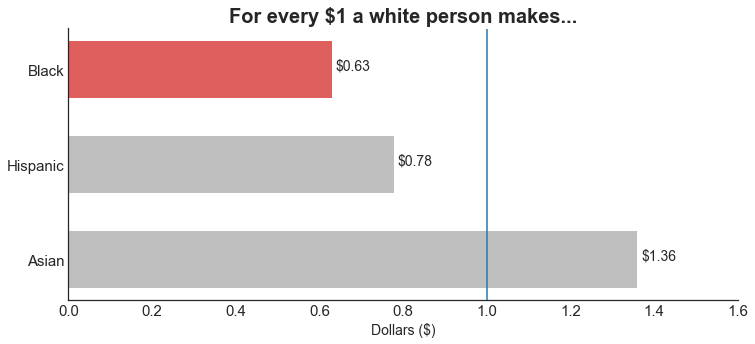

In [15]:
#############################################################################
## For every $1 a white person makes, how much does every other race make? ##
#############################################################################

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()

# Baseline for $1 
plt.axvline(x=1)

# Plotting all the pay differences
ax.barh(y=[1,2,3] , 
        width=pay_diff_w,
        height=0.6,
        color="grey", 
        alpha=0.5)

# Plotting the black pay difference in red
ax.barh(y = 3,
        width = pay_diff_w[2],
        height=0.6,
        color="r",
        alpha=0.5)

# Changing the ticks
plt.xticks((np.arange(0, 1.8, .2)))
plt.yticks(ticks=[1,2,3], labels=["Asian", "Hispanic", "Black"])
plt.tick_params(labelsize=15)

# Changing the x-label
plt.xlabel("Dollars ($)", fontdict={"fontsize":14})

# Annotating each pay difference on the graph
ax.annotate("${:.2f}".format(pay_diff_w[0]),
            xy = (pay_diff_w[0]+.01,1)).set_fontsize(14)

ax.annotate("${:.2f}".format(pay_diff_w[1]),
            xy = (pay_diff_w[1]+.01,2)).set_fontsize(14)

ax.annotate("${:.2f}".format(pay_diff_w[2]),
            xy = (pay_diff_w[2]+.01,3)).set_fontsize(14)

plt.title("For every $1 a white person makes...",
          fontdict={"fontsize":20, "fontweight":"bold"})

# Remove spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


In [16]:
income_b = file['black']["median_estimate"][0]
income_w = file['white']["median_estimate"][0]

print("In 2019, this was the median income for blacks: ${:,}".format(income_b))
print("In 2019, this was the median income for whites: ${:,}".format(income_w))

In 2019, this was the median income for blacks: $45,438
In 2019, this was the median income for whites: $72,204


# Conclusion

In this basic exploratory data analysis, we answered the following questions:
- What percentage of all the races is in each social class (high income and low income)?
   - **18.6% are high income**
   - **37.1% are low income**
   - **44.3% are middle class**
- Find out the average salary of blacks
   - **Median salary of blacks in 2019: \\$45,438**
- How does the income of a black person compare to everyone else?**
   - **For every \\$1 a white person makes, an asian person makes \\$1.36.**
   - **For every \\$1 a white person makes, a hispanic person makes \\$0.78.**
   - **For every \\$1 a white person makes, a black person makes \\$0.63.**
   
## Next steps
Given the results of this basic EDA, we can research into why there is still an income disparity amongst not only blacks, but the other races as well. Why do asians tend to make more than a white? What kind of resources (education programs, awareness of these issues, etc.) can be deployed that might have an effect on the income disparity?